The firm is interested in understanding:
* What factors are important in estimating demand for shared bikes?
* How effectively do those factors describe the demands of the bike?
* The solution to this problem can be divided into the components that are listed below:
    -  Understanding and performing data exploration
    -  Data Visualisation
    -  Data Preparation
    -  Model building and evaluation

# Step 1: Understanding and exploring data 

In [1]:
import warnings
warnings.filterwarnings('ignore')             # Filtering/ignoring warnings

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bike_df = pd.read_csv(r'C:\Users\LENOVO\Downloads\Bike_Sharing_Assignment\bike_data.csv')   #Loading dataset

In [4]:
bike_df.shape     # display no.s of rows and columns in the dataset (730-rows, 16-columns)

(730, 16)

In [5]:
bike_df.info()    # displays summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_df.describe()       # finding insights

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_df.isnull().sum() # checking for the null values in column data  (note: this dataset do not contain any null values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bike_df.dtypes  # learning datatypes in this dataset

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
bike_df.nunique()       # finding unique values

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [10]:
# dropping the unwanted columns
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [11]:
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})    # Encoding/mapping the season column

In [12]:
# Encoding the month column
bike_df.mnth = bike_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [13]:
# Mapping the weekday column
bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [14]:
# Encoding the weathersit column
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [15]:
bike_df.info()    # displays summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


* So far, our understanding on data (Outcome) :
  - Except for one column, the date, which is of the object type, the others are of the float or integer type. 
  - Some fields are categorical in nature yet are in the integer/float type. 
  - We have to analyse them and decide whether to convert them to categorical or treat them as integers.

# Step 2: Data Visualisation (graphical representation of our data)

 - Now, we'll move ahead and start performing one of the crucial steps: understanding the data.
   - If there seems to be multicollinearity, this would be the first step where we can confirm it.
   - This is also where we'll find out if some predictors strongly correlated  with the outcome variable.

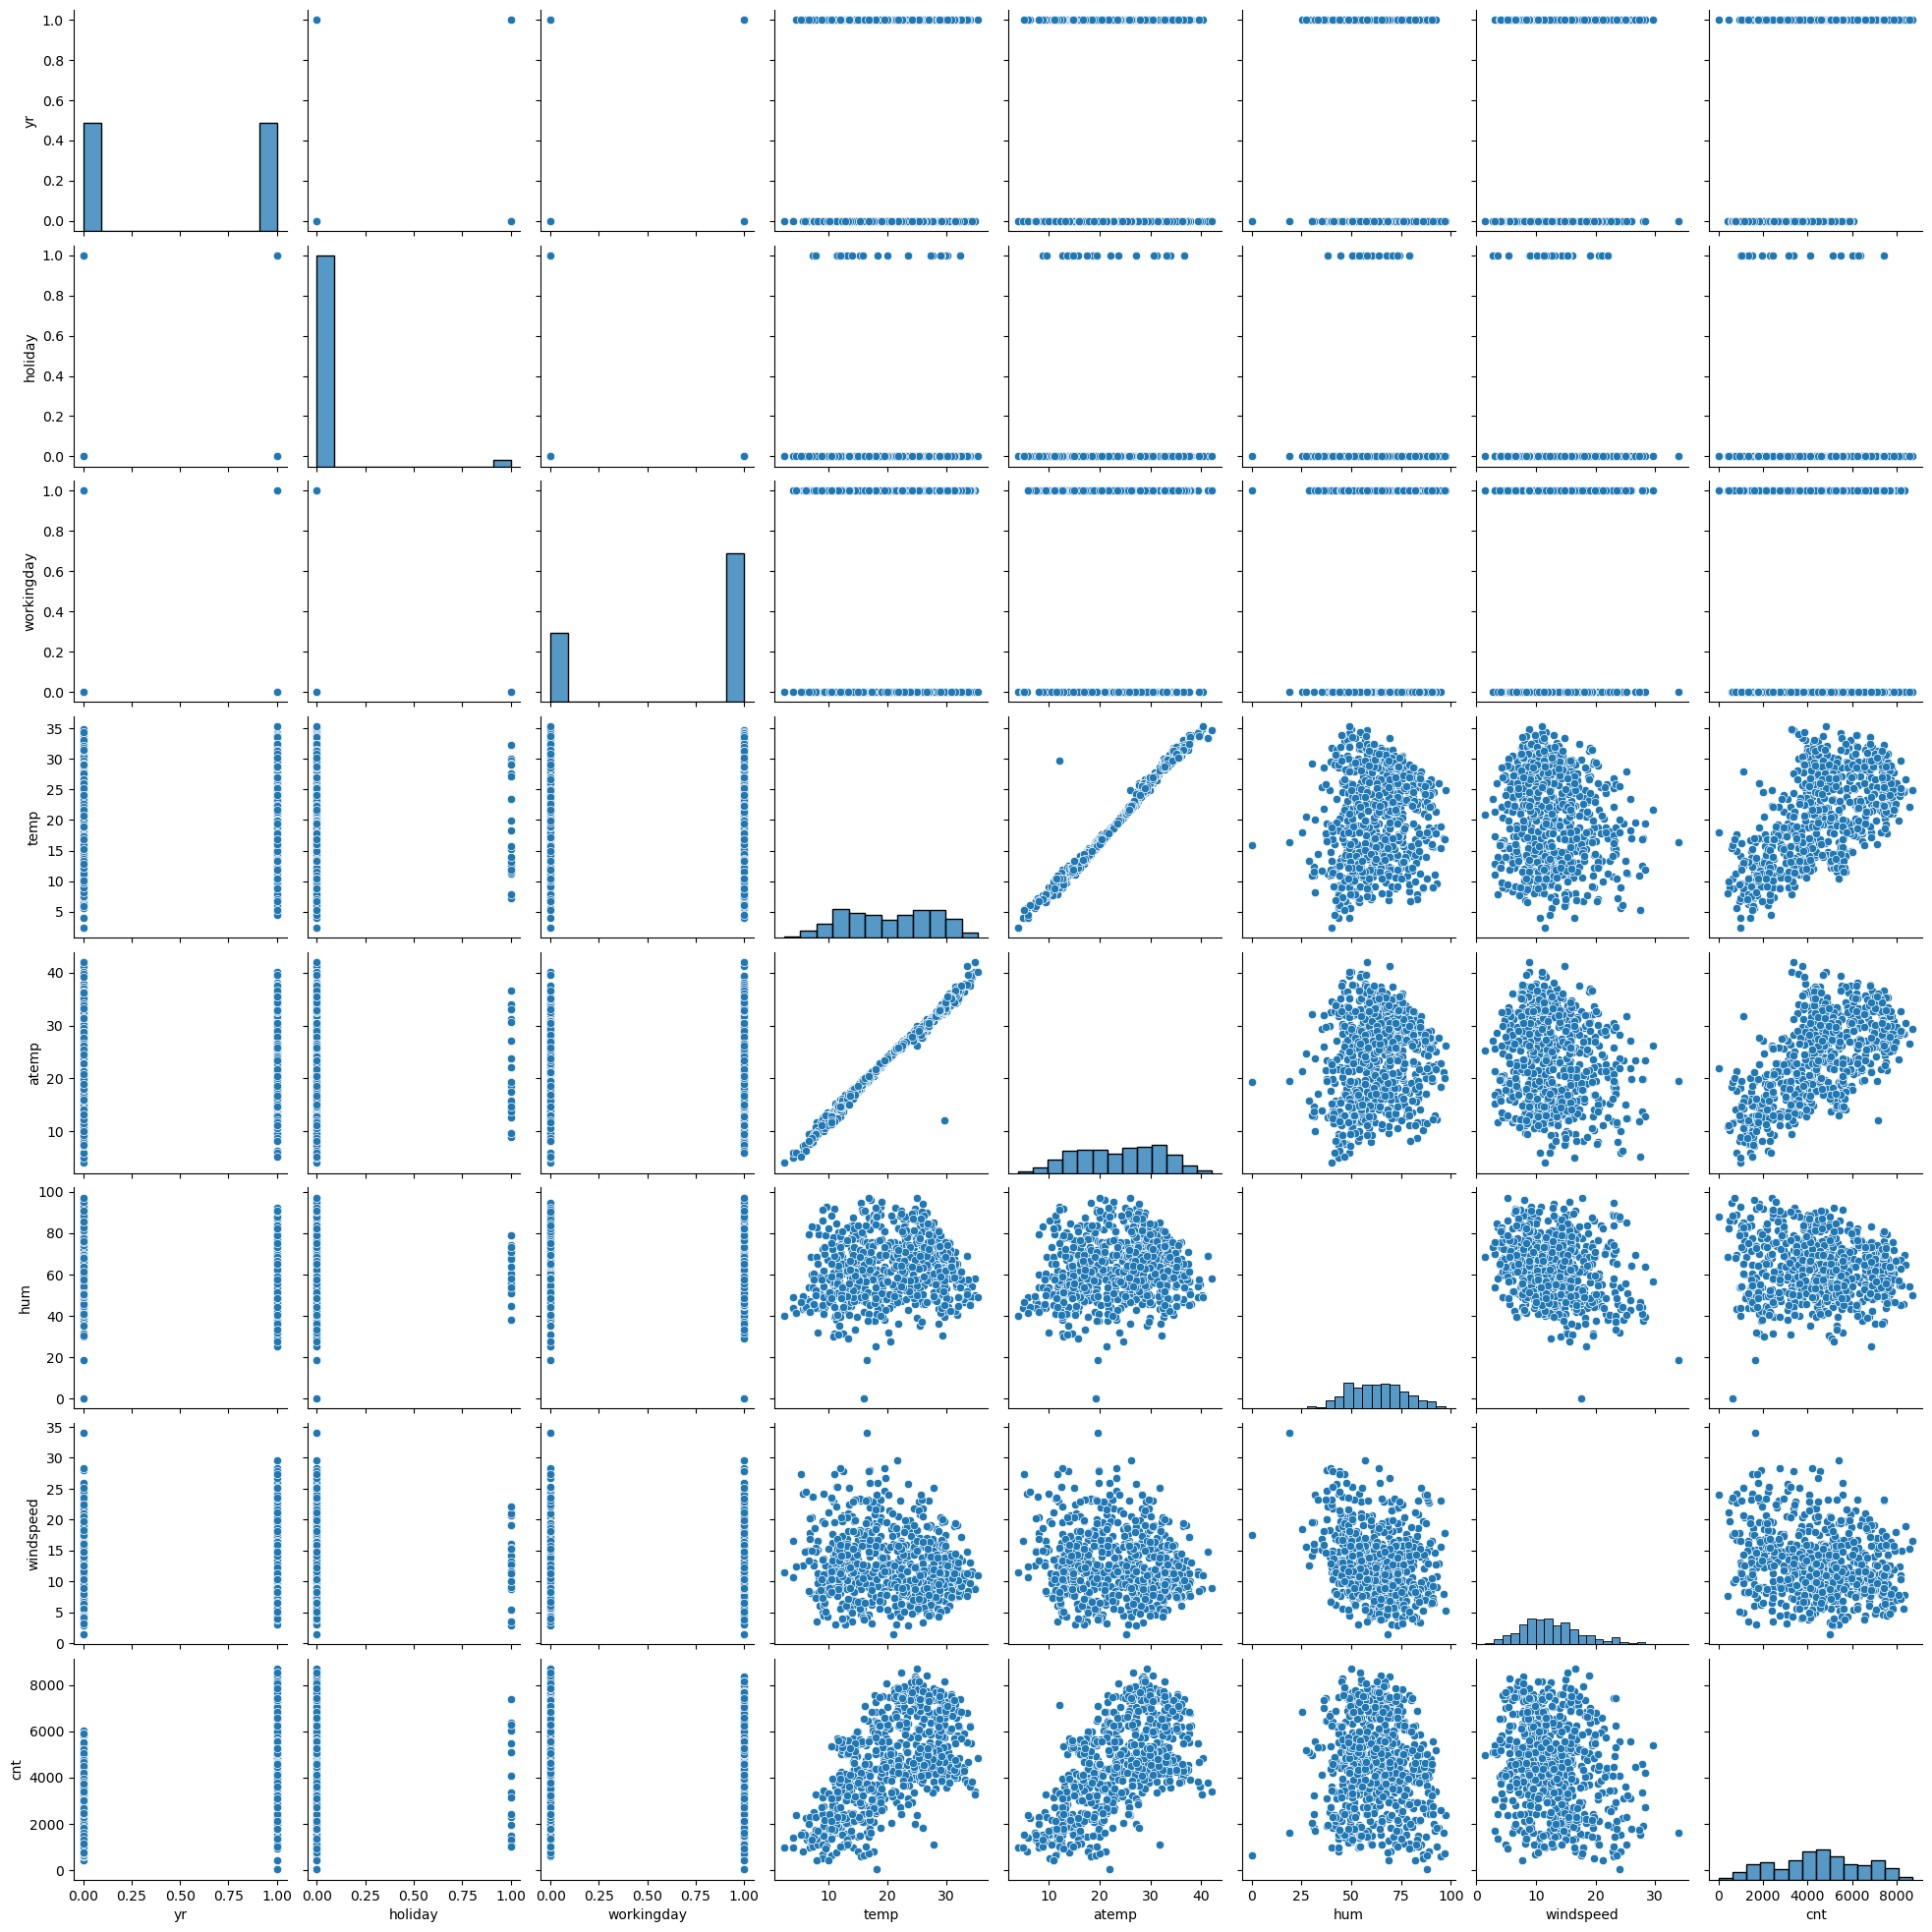

In [16]:
sns.pairplot(bike_df)      # Plot pairwise relationships in a dataset
plt.show()

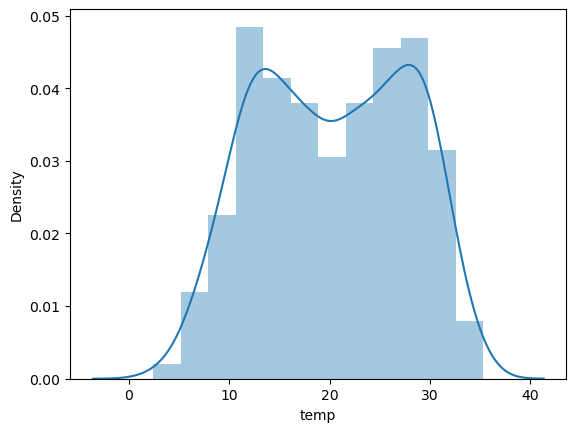

In [17]:
sns.distplot(bike_df['temp'])            # for univariant set of observations and visualisations (Temperature)
plt.show()

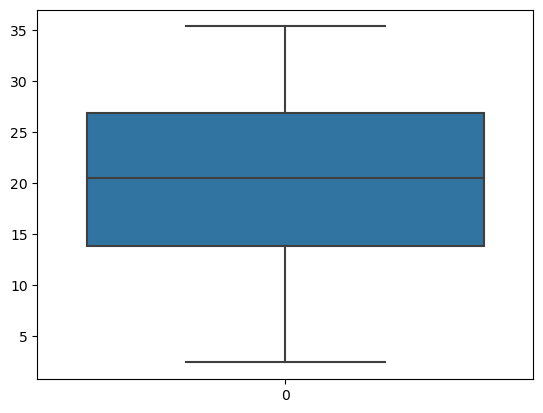

In [18]:
sns.boxplot(bike_df['temp'])    # box-and-whisker plot shows the distribution of quantitative data
plt.show()

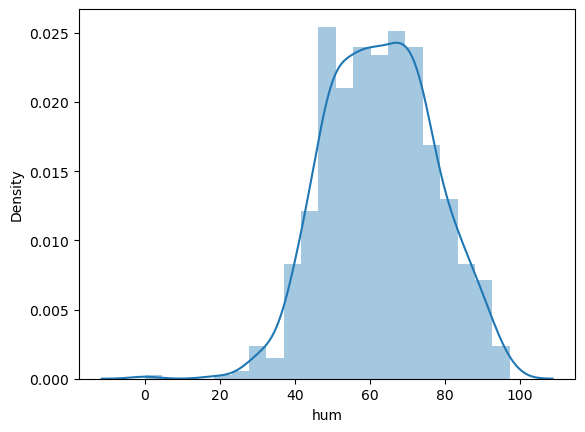

In [19]:
sns.distplot(bike_df['hum'])      # distribution plot represents data in histogram form (Humidity)
plt.show()

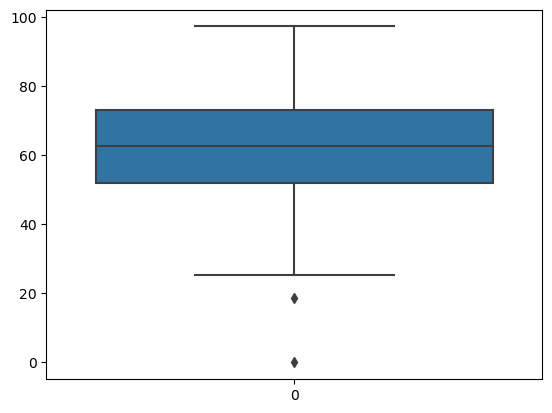

In [20]:
sns.boxplot(bike_df['hum'])    # visual representation of the depicting groups of numerical data through quartiles
plt.show()

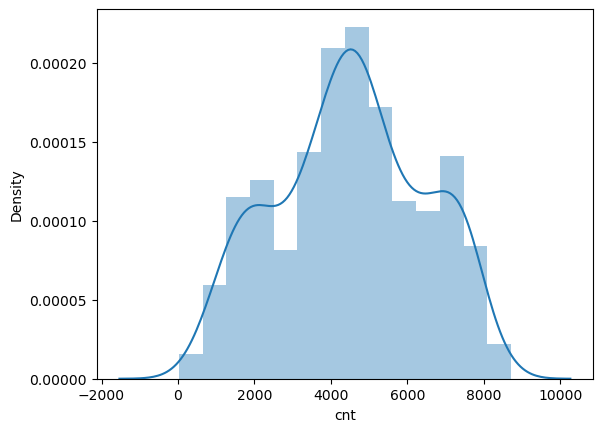

In [21]:
sns.distplot(bike_df['cnt'])   # cnt: count of total rental bikes including both casual and registered
plt.show()

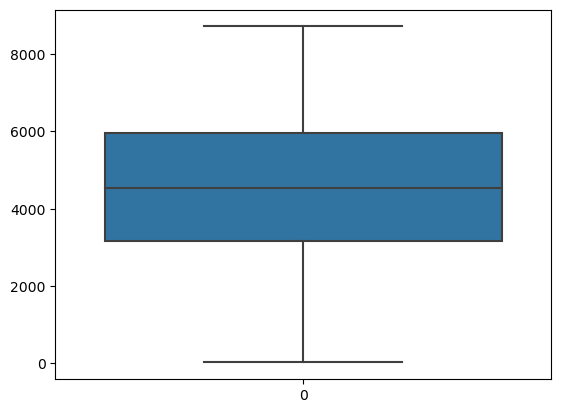

In [22]:
sns.boxplot(bike_df['cnt']) # distribution of quantitative data facilitates comparisons between variables of a categorical variable
plt.show()

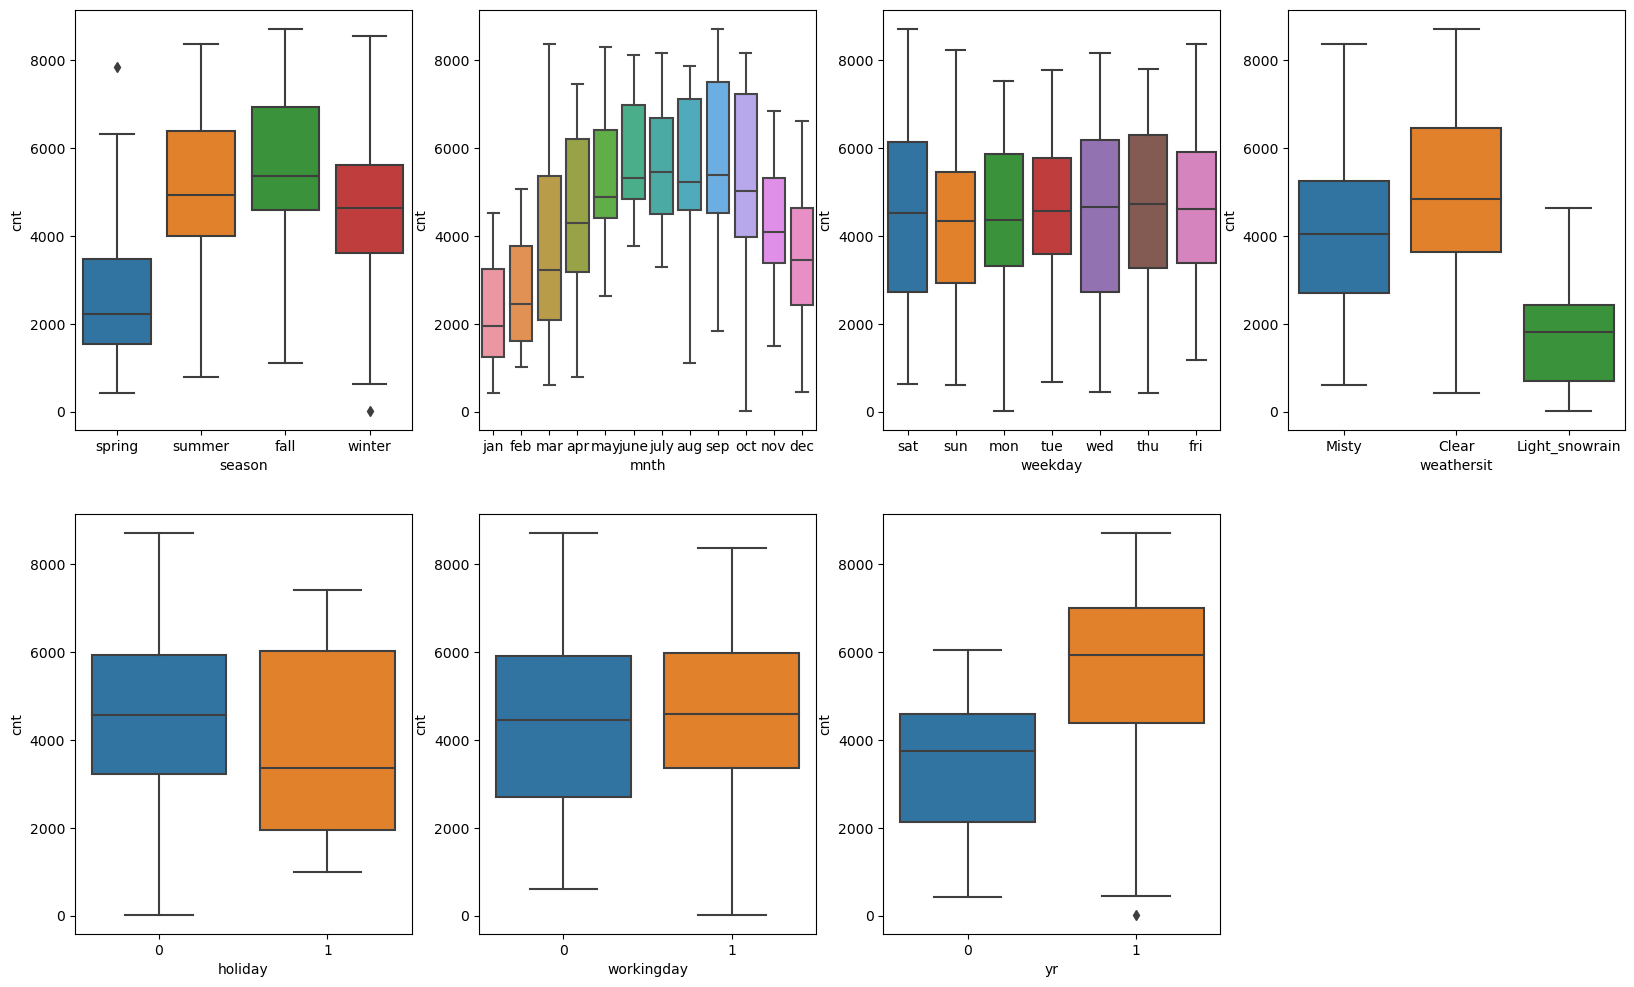

In [23]:
# Analysing the categorical columns to determine the way predictor variable stands against the target variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.show()

-0.5807160633954185


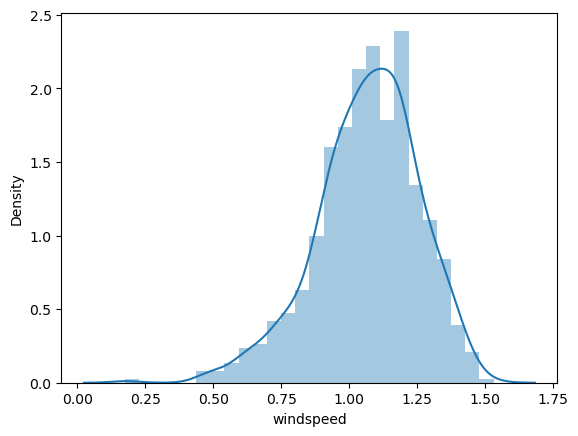

In [24]:
transformed = np.log10(bike_df['windspeed'])
sns.distplot(transformed)
print(transformed.skew())     # displays the direction of outliers

-1.048448789292243


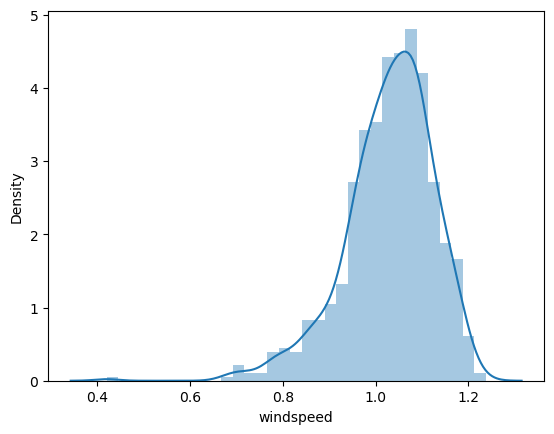

In [25]:
transformed = np.log10(bike_df['windspeed'])**0.5
sns.distplot(transformed)             # represents the overall distribution of continuous variables
print(transformed.skew())

-1.048448789292243


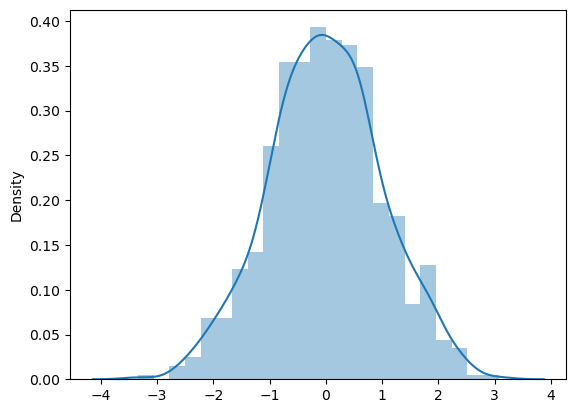

In [26]:
from sklearn.preprocessing import PowerTransformer     # provides several common utility functions to change raw feature vectors into  suitable downstream estimators.
pwer_trns = PowerTransformer(method='box-cox')                # to make data more Gaussian-like
tranformed = pwer_trns.fit_transform(bike_df[['windspeed']])
sns.distplot(tranformed)
print(transformed.skew())

In [27]:
bike_df['transformedwindspeed'] = pwer_trns.fit_transform(bike_df[['windspeed']])

In [28]:
bike_df_numeric = bike_df.select_dtypes(include=['float64'])   # All numeric variables in the dataset
bike_df_numeric.head()

,temp,atemp,hum,windspeed,transformedwindspeed
0,14.110847,18.18125,80.5833,10.749882,-0.284216
1,14.902598,17.68695,69.6087,16.652113,0.806461
2,8.050924,9.47025,43.7273,16.636703,0.803938
3,8.200000,10.60610,59.0435,10.739832,-0.286341
4,9.305237,11.46350,43.6957,12.522300,0.073819


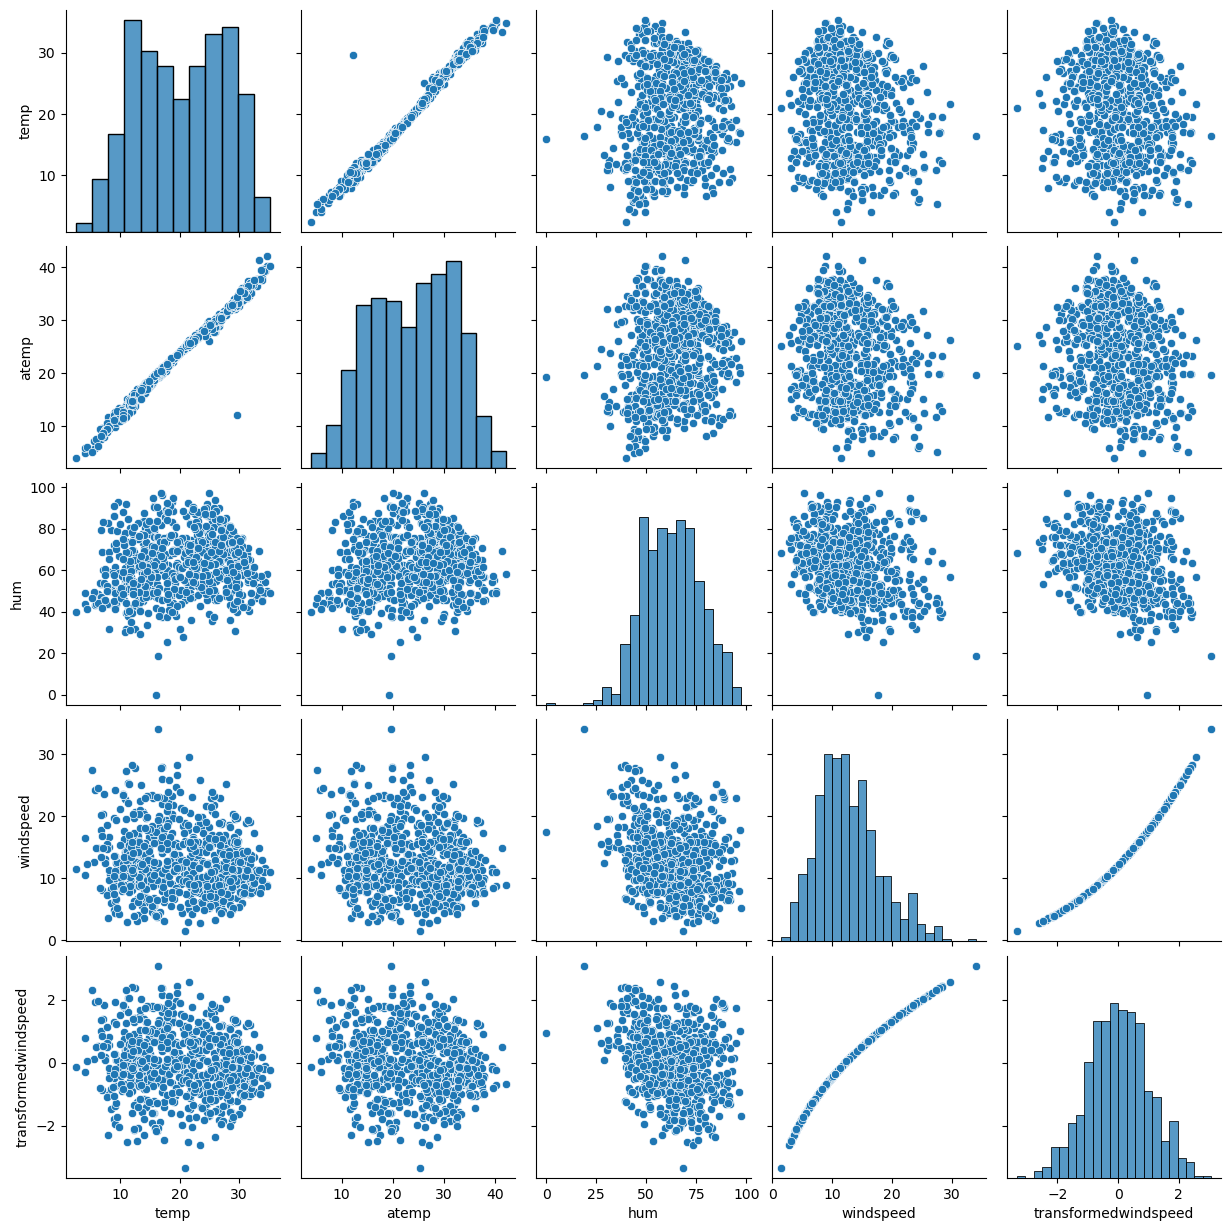

In [29]:
sns.pairplot(bike_df_numeric)    # Pairwise Scatter Plot
plt.show()

In [30]:
cor = bike_df_numeric.corr()    #Correlation Matrix
cor

,temp,atemp,hum,windspeed,transformedwindspeed
temp,1.000000,0.991696,0.128565,-0.158186,-0.136005
atemp,0.991696,1.000000,0.141512,-0.183876,-0.162417
hum,0.128565,0.141512,1.000000,-0.248506,-0.250221
windspeed,-0.158186,-0.183876,-0.248506,1.000000,0.986276
transformedwindspeed,-0.136005,-0.162417,-0.250221,0.986276,1.000000


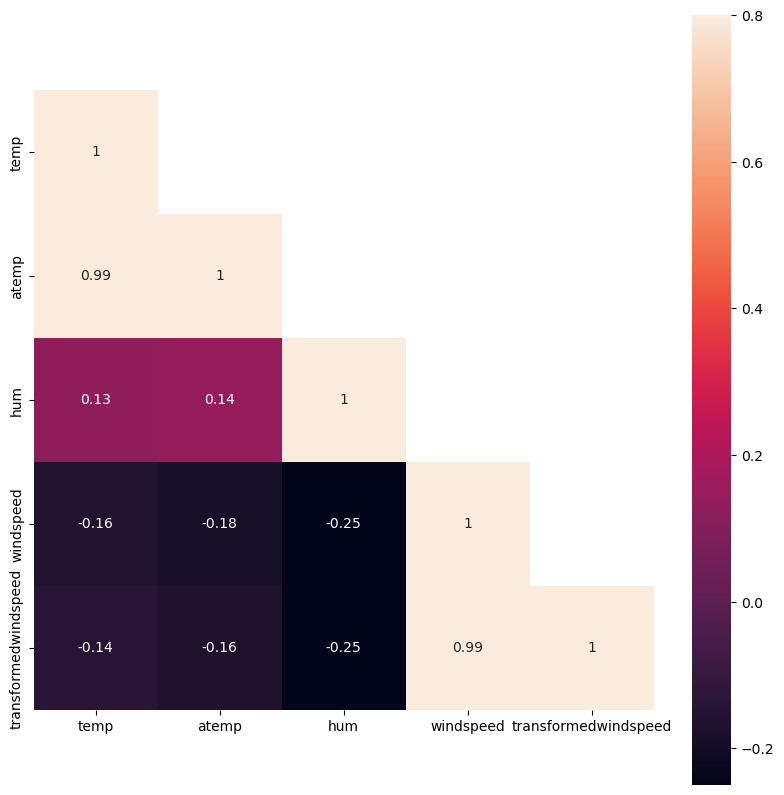

In [31]:
mask= np.array(cor)           # Heatmap
mask[np.tril_indices_from(mask)]= False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=.8,square=True,annot=True)
plt.show()

In [32]:
bike_df.info()    # displays summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                730 non-null    object 
 1   yr                    730 non-null    int64  
 2   mnth                  730 non-null    object 
 3   holiday               730 non-null    int64  
 4   weekday               730 non-null    object 
 5   workingday            730 non-null    int64  
 6   weathersit            730 non-null    object 
 7   temp                  730 non-null    float64
 8   atemp                 730 non-null    float64
 9   hum                   730 non-null    float64
 10  windspeed             730 non-null    float64
 11  cnt                   730 non-null    int64  
 12  transformedwindspeed  730 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 74.3+ KB


## Step 3: Data Preparation

Creating Dummy Variables

In [33]:
bike_df_new=bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [34]:
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [35]:
# Creating dummy variable for month, weekday, weathersit and season variables.
mnths_df=pd.get_dummies(bike_df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_df.season,drop_first=True)

In [36]:
bike_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [37]:
#bike_df_new.info()    # displays summary of the dataset

In [38]:
bike_df_categorical=bike_df_new.select_dtypes(include=['object'])   #Subset of all categorical variables

Dummy Variables

Variable e.g. season,mnth,weekday and weathersit have different levels, and now need to convert these levels into integers.

In [39]:
bike_df_dummies = pd.get_dummies(bike_df_categorical, drop_first=True)   # Convert into dummies
bike_df_dummies.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
bike_df_dummies.info()    # displays summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   season_spring              730 non-null    uint8
 1   season_summer              730 non-null    uint8
 2   season_winter              730 non-null    uint8
 3   mnth_aug                   730 non-null    uint8
 4   mnth_dec                   730 non-null    uint8
 5   mnth_feb                   730 non-null    uint8
 6   mnth_jan                   730 non-null    uint8
 7   mnth_july                  730 non-null    uint8
 8   mnth_june                  730 non-null    uint8
 9   mnth_mar                   730 non-null    uint8
 10  mnth_may                   730 non-null    uint8
 11  mnth_nov                   730 non-null    uint8
 12  mnth_oct                   730 non-null    uint8
 13  mnth_sep                   730 non-null    uint8
 14  weekday_mon               

In [41]:
bike_df_new = bike_df_new.drop(list(bike_df_categorical.columns), axis=1)

In [42]:
bike_df_new = pd.concat([bike_df_new,bike_df_dummies],axis=1)

In [43]:
bike_df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
#Merging  the dataframe, with the dummy variable dataset
bike_df_new = pd.concat([bike_df,mnths_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [46]:
bike_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [47]:
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                730 non-null    object 
 1   yr                    730 non-null    int64  
 2   mnth                  730 non-null    object 
 3   holiday               730 non-null    int64  
 4   weekday               730 non-null    object 
 5   workingday            730 non-null    int64  
 6   weathersit            730 non-null    object 
 7   temp                  730 non-null    float64
 8   atemp                 730 non-null    float64
 9   hum                   730 non-null    float64
 10  windspeed             730 non-null    float64
 11  cnt                   730 non-null    int64  
 12  transformedwindspeed  730 non-null    float64
 13  aug                   730 non-null    uint8  
 14  dec                   730 non-null    uint8  
 15  feb                   7

In [48]:
bike_df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True) # # dropping unnecessary columns 

In [49]:
bike_df_new.head()    # displays the head of new dataframe

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,transformedwindspeed,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,-0.284216,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0.806461,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0.803938,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,-0.286341,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0.073819,0,...,0,0,0,0,1,0,0,1,0,0


In [50]:
bike_df_new.shape     # displays the shape of new dataframe

(730, 31)

In [51]:
bike_df_new.info()    # displays the column info of new dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   atemp                 730 non-null    float64
 5   hum                   730 non-null    float64
 6   windspeed             730 non-null    float64
 7   cnt                   730 non-null    int64  
 8   transformedwindspeed  730 non-null    float64
 9   aug                   730 non-null    uint8  
 10  dec                   730 non-null    uint8  
 11  feb                   730 non-null    uint8  
 12  jan                   730 non-null    uint8  
 13  july                  730 non-null    uint8  
 14  june                  730 non-null    uint8  
 15  mar                   7

# Step 4: Splitting the data into training & testing sets

In [52]:
# importing libraries to train our model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

Splitting the data into Train and Test (70:30 ratio)

In [53]:
bike_df_new.shape     # displays the shape of new dataframe

(730, 31)

In [54]:
#  Adjusting 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_df_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [55]:
df_train.info()    #displays the info and shape of the dataframes after split

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    510 non-null    int64  
 1   holiday               510 non-null    int64  
 2   workingday            510 non-null    int64  
 3   temp                  510 non-null    float64
 4   atemp                 510 non-null    float64
 5   hum                   510 non-null    float64
 6   windspeed             510 non-null    float64
 7   cnt                   510 non-null    int64  
 8   transformedwindspeed  510 non-null    float64
 9   aug                   510 non-null    uint8  
 10  dec                   510 non-null    uint8  
 11  feb                   510 non-null    uint8  
 12  jan                   510 non-null    uint8  
 13  july                  510 non-null    uint8  
 14  june                  510 non-null    uint8  
 15  mar                  

In [56]:
df_train.shape

(510, 31)

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    219 non-null    int64  
 1   holiday               219 non-null    int64  
 2   workingday            219 non-null    int64  
 3   temp                  219 non-null    float64
 4   atemp                 219 non-null    float64
 5   hum                   219 non-null    float64
 6   windspeed             219 non-null    float64
 7   cnt                   219 non-null    int64  
 8   transformedwindspeed  219 non-null    float64
 9   aug                   219 non-null    uint8  
 10  dec                   219 non-null    uint8  
 11  feb                   219 non-null    uint8  
 12  jan                   219 non-null    uint8  
 13  july                  219 non-null    uint8  
 14  june                  219 non-null    uint8  
 15  mar                   

In [58]:
df_test.shape

(219, 31)

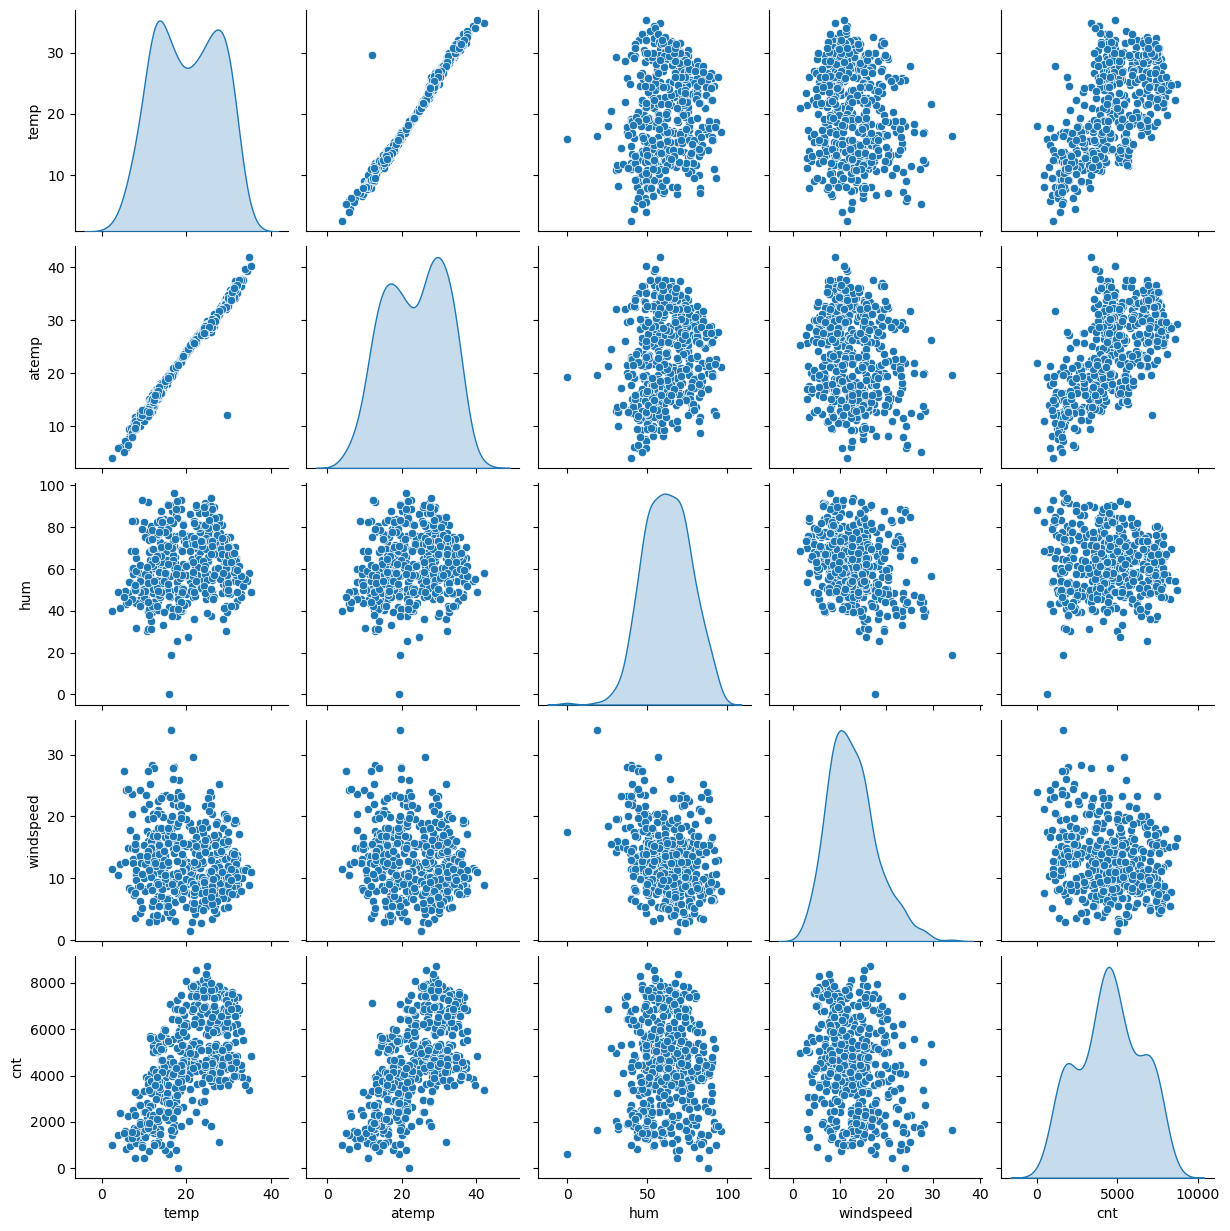

In [59]:
#Creating a new dataframe of only numeric variables:
bike_numc=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bike_numc, diag_kind='kde')
plt.show()

Correlation Matrix

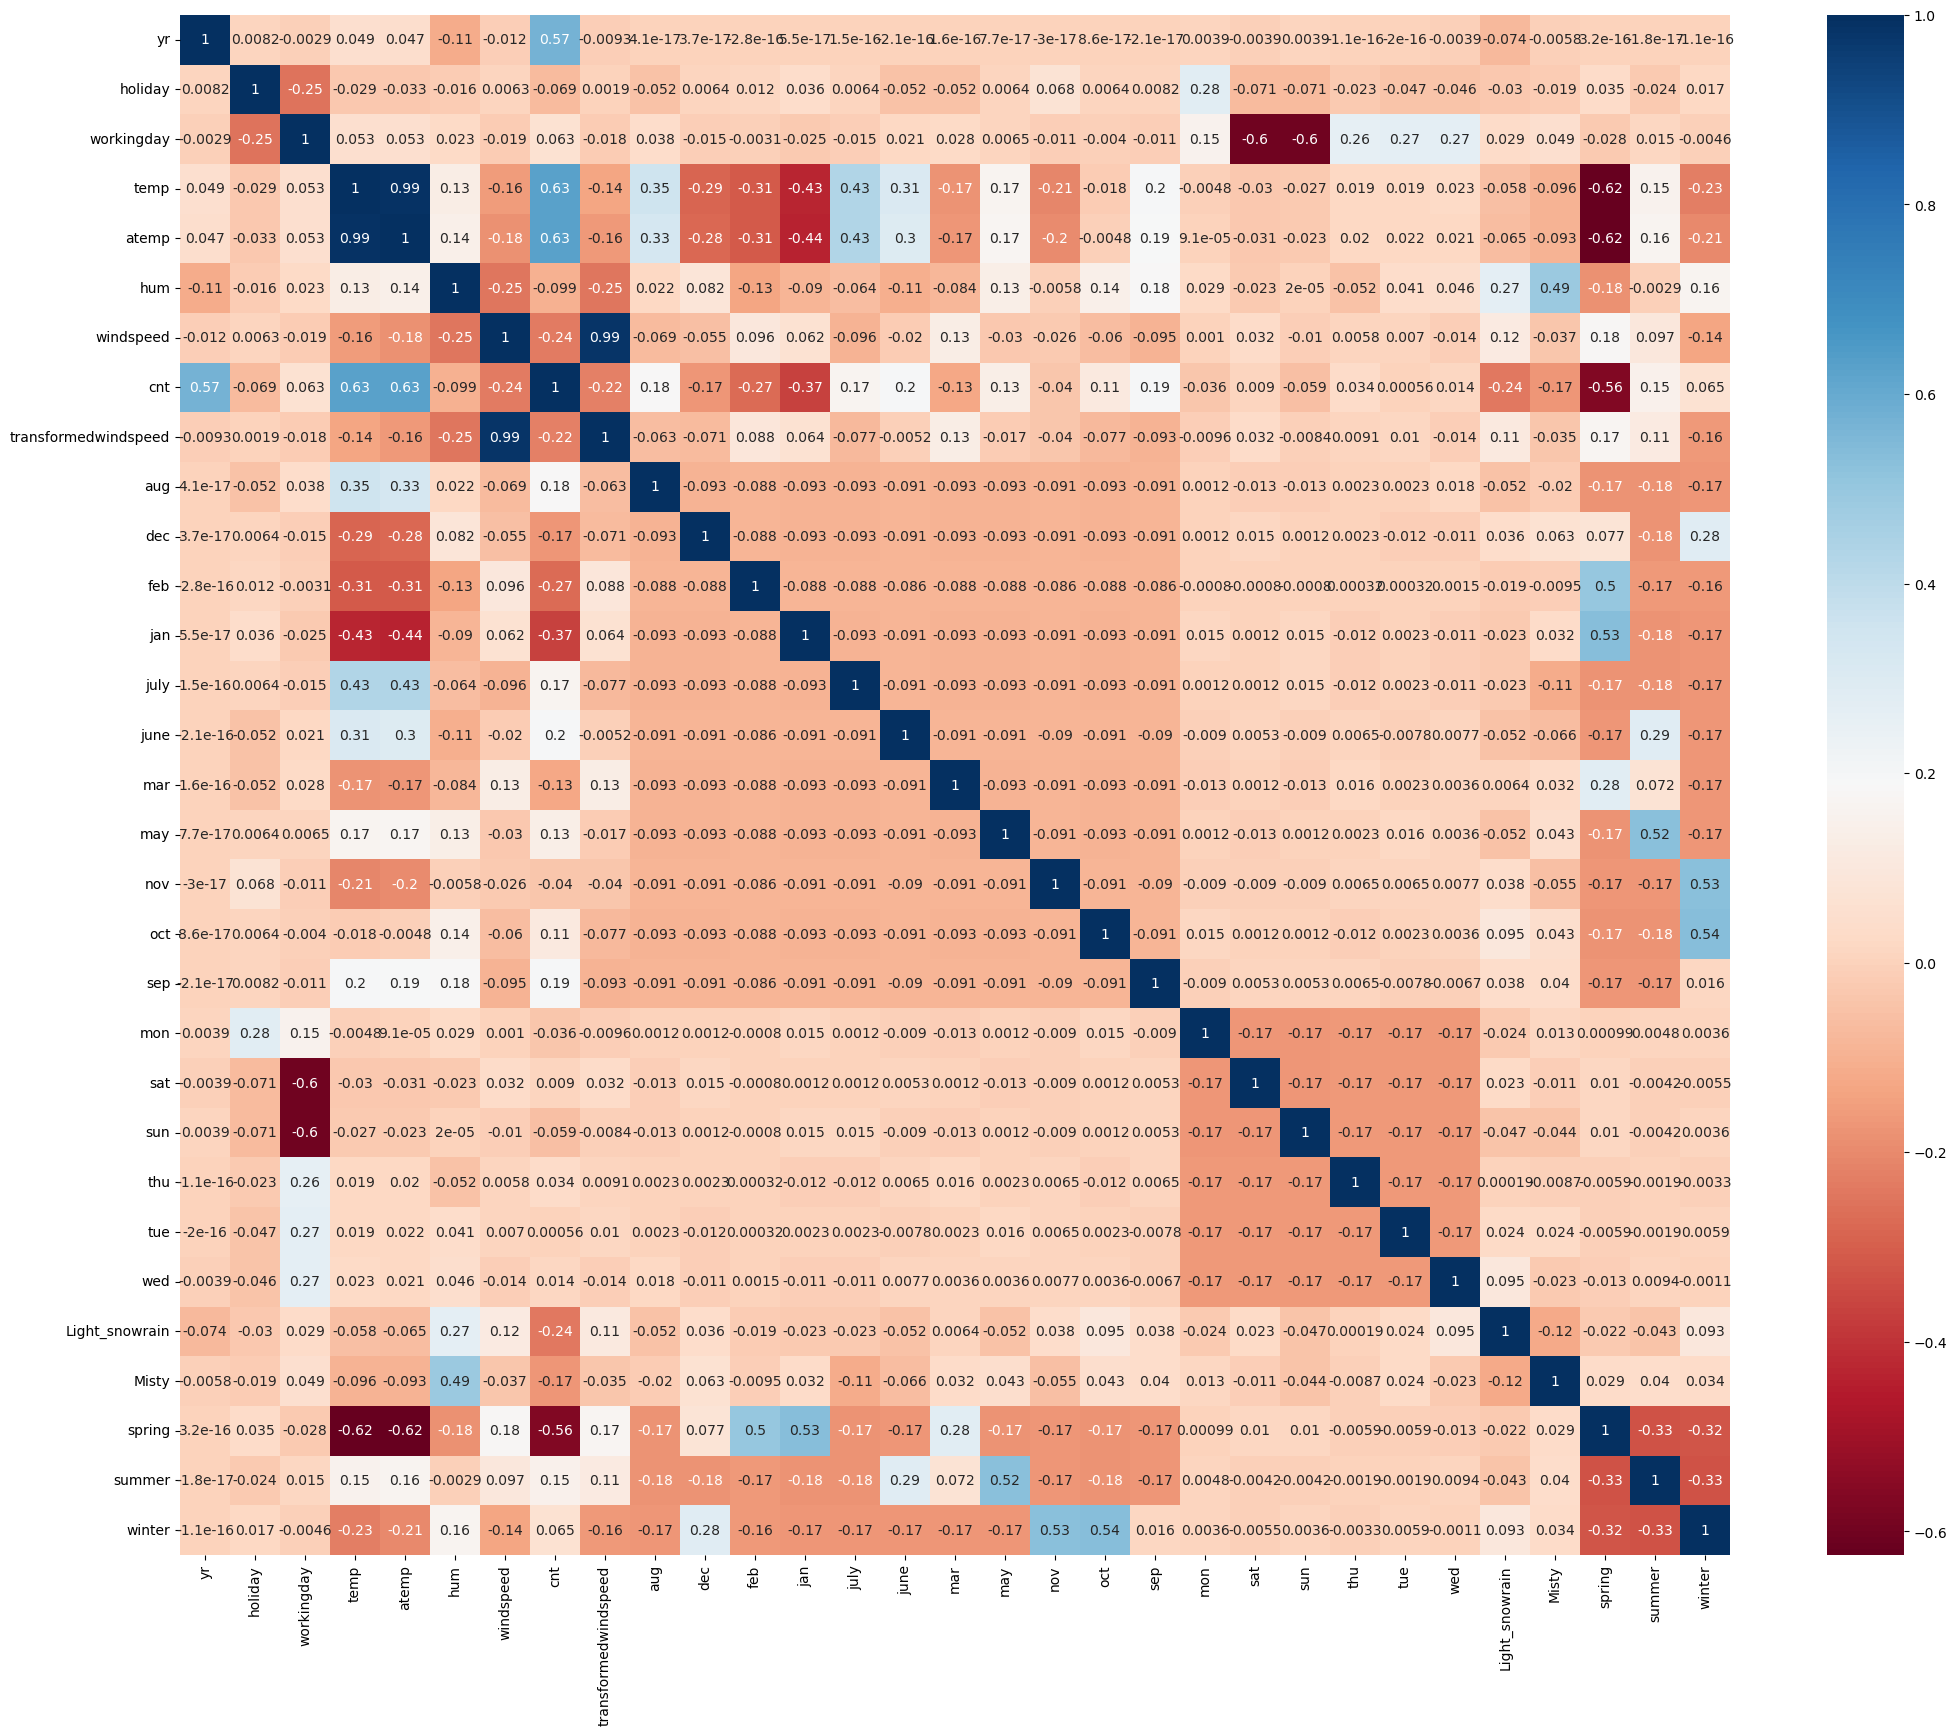

In [60]:
# Now let's find correlation coefficients to check which variables are highly correlated
plt.figure(figsize = (25,20))
sns.heatmap(bike_df_new.corr(), annot = True, cmap="RdBu")
plt.show()

Rescaling features

In [61]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

In [62]:
df_train.head()         # displays values before scaling

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,transformedwindspeed,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,-0.958260,0,...,0,1,0,0,0,0,0,0,1,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,-0.492342,0,...,1,0,0,0,0,0,0,0,0,1
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,-0.337393,1,...,0,0,0,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,-1.245764,0,...,0,1,0,0,0,0,1,0,0,1
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1.915454,0,...,0,1,0,0,0,0,0,1,0,0


In [63]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'transformedwindspeed', 'aug', 'dec', 'feb', 'jan', 'july',
       'june', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [64]:
numl_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[numl_vars] = mm_scaler.fit_transform(df_train[numl_vars])

In [65]:
numl_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']              # Apply scaler() to all the numeric variables
df_train[numl_vars] = mm_scaler.fit_transform(df_train[numl_vars])

In [66]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,transformedwindspeed,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,-0.958260,0,...,0,1,0,0,0,0,0,0,1,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,-0.492342,0,...,1,0,0,0,0,0,0,0,0,1
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,-0.337393,1,...,0,0,0,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,-1.245764,0,...,0,1,0,0,0,0,1,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1.915454,0,...,0,1,0,0,0,0,0,1,0,0


In [67]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,transformedwindspeed,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,-0.001852,0.098039,...,0.150980,0.143137,0.129412,0.141176,0.150980,0.025490,0.341176,0.24902,0.247059,0.241176
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,1.002126,0.297660,...,0.358381,0.350557,0.335985,0.348545,0.358381,0.157763,0.474570,0.43287,0.431725,0.428217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.339828,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,-0.673245,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,-0.011952,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.633418,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.071575,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Building a Linear Model

Splitting into X and Y sets for the model building

In [68]:
y_train = df_train.pop('cnt')
X_train = df_train

In [69]:
# Running RFE with the output number of the variable equal to 15
LRM = LinearRegression()
LRM.fit(X_train, y_train)

rfe = RFE(LRM, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('transformedwindspeed', False, 10),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 9),
 ('jan', False, 7),
 ('july', True, 1),
 ('june', False, 15),
 ('mar', True, 1),
 ('may', False, 5),
 ('nov', False, 3),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 6),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 11),
 ('wed', False, 16),
 ('Light_snowrain', True, 1),
 ('Misty', False, 2),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1)]

In [70]:
colm = X_train.columns[rfe.support_]
colm

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'july', 'mar', 'sep', 'sat', 'sun', 'Light_snowrain', 'spring',
       'winter'],
      dtype='object')

In [71]:
X_train.columns[~rfe.support_]

Index(['transformedwindspeed', 'aug', 'dec', 'feb', 'jan', 'june', 'may',
       'nov', 'oct', 'mon', 'thu', 'tue', 'wed', 'Misty', 'summer'],
      dtype='object')

In [72]:
X_train_rfe = X_train[colm]     # Creating X_test dataframe with RFE selected variables

# Building Linear Model using 'STATS MODEL'

# Model 1

### Variance Inflation Factor (VIF) Check

In [73]:
vif = pd.DataFrame()         # Creating a dataframe to store the names of all the feature variables and their respective VIFs
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,53.37
4,atemp,51.69
2,workingday,41.54
10,sat,9.82
11,sun,9.46
13,spring,2.65
1,holiday,2.44
14,winter,1.78
7,july,1.31
5,hum,1.27


In [74]:
X_train_LRM_1 = sm.add_constant(X_train_rfe)     # Adding a constant

LRM_1 = sm.OLS(y_train, X_train_LRM_1).fit()       # Creating a first fitted model

In [75]:
LRM_1.params                       # Checking obtained parameters

const             0.297585
yr                0.226167
holiday           0.047875
workingday        0.089251
temp              0.344771
atemp             0.169790
hum              -0.266206
windspeed        -0.198598
july             -0.052780
mar               0.045627
sep               0.068353
sat               0.105309
sun               0.055150
Light_snowrain   -0.224711
spring           -0.115511
winter            0.061016
dtype: float64

In [76]:
print(LRM_1.summary())              # displays summary of linear regression model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          5.41e-181
Time:                        02:28:17   Log-Likelihood:                 493.12
No. Observations:                 510   AIC:                            -956.2
Df Residuals:                     495   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2976      0.026     11.

# Model 2

Dropping 'atemp' variable based on its high p-value and high VIF

In [77]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [78]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,41.24
9,sat,9.74
10,sun,9.39
3,temp,2.93
12,spring,2.65
1,holiday,2.44
13,winter,1.77
6,july,1.31
4,hum,1.27
5,windspeed,1.18


In [79]:
X_train_LRM_2 = sm.add_constant(X_train_new)      # add a constant
LRM_2 = sm.OLS(y_train, X_train_LRM_2).fit()     # Create a first fitted model

In [80]:
LRM_2.params       # Checking parameters 

const             0.300155
yr                0.226160
holiday           0.047729
workingday        0.089999
temp              0.501987
hum              -0.264475
windspeed        -0.204769
july             -0.052873
mar               0.046418
sep               0.067340
sat               0.106292
sun               0.056134
Light_snowrain   -0.225742
spring           -0.115806
winter            0.062235
dtype: float64

In [82]:
print(LRM_2.summary())             # displays a summary of linear regression model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.4
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          8.09e-182
Time:                        02:34:09   Log-Likelihood:                 492.36
No. Observations:                 510   AIC:                            -956.7
Df Residuals:                     496   BIC:                            -897.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3002      0.026     11.

# Adjusted R-Squared value for Test

In [ ]:
# We already have the value of R-Squared

r2=0.8203092200749708


In [ ]:
# Get the shape of X_test
X_test.shape

In [ ]:
n = X_test.shape[0]

p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2